In [1]:
%run '../definitions.ipynb'

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import zipfile
import zlib

In [3]:
def read_event(filename = "./cs_waveforms/XAMS-0-000000000-000000099-000000100.zip", event_number = 0):
    file = zipfile.ZipFile(filename, "r" ) 
    with file.open('%d' % event_number) as event_in_zip:
        data = event_in_zip.read()
        data = zlib.decompress(data)
        ev = pickle.loads(data)
    return ev

In [4]:
ev = read_event(event_number=2)

In [10]:
wf_tpc     = ev.get_sum_waveform('tpc').samples
wf_tpc_raw = ev.get_sum_waveform('tpc_raw').samples
sample_number = np.array([_x for _x in range(len(wf_tpc))])
t = sample_number * 0.002
nonzle = wf_tpc != 0

In [12]:
plt.style.use('latex_prl')

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [14]:
p = ev.peaks[0]
s1s = [p for p in ev.peaks if p.type == 's1']
s2s = [p for p in ev.peaks if p.type == 's2']

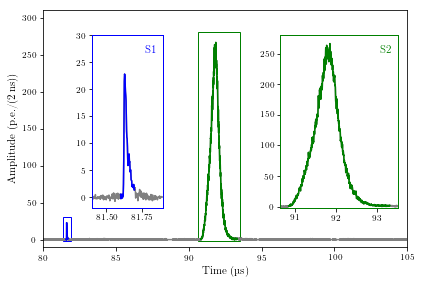

In [93]:
f_from_corner_x = 0.25
f_from_corner_y = 0.1

fig = plt.figure()
plt.plot(t, wf_tpc_raw, color='gray')
ax0 = plt.gca()
# This line does NOT work because it connects the bits that are non-zle with straight lines...
# plt.plot(t[nonzle], wf_tpc[nonzle], color='black')
plt.xlim(80, 105)
plt.ylim(-10, 310)

for p in s1s:
    # left and right are INclusive!
    p_range = (p.left, p.right)
    in_range = (sample_number >= p.left) & (sample_number <= p.right)
    plt.plot(t[in_range], wf_tpc[in_range], color='blue')

for p in s2s:
    # left and right are INclusive!
    p_range = (p.left, p.right)
    in_range = (sample_number >= p.left) & (sample_number <= p.right)
    plt.plot(t[in_range], wf_tpc[in_range], color='green')
    
plt.xlabel(r'Time (\si{\micro s})')
plt.ylabel(r'Amplitude (p.e./(\SI{2}{\nano s}))')


############# S1 panel
s1_pad = 100 # samples
ylim_box = (-2, 30)

# Get S1 properties
p = s1s[0]
p_range = (p.left, p.right)
in_range = (sample_number >= p.left) & (sample_number <= p.right)
xlim_box = ((p_range[0] - s1_pad) * 0.002, (p_range[1] + s1_pad) * 0.002)

# Draw the box around s1 in main fig
draw_box(xlim_box, ylim_box, edgecolor='blue')

# Now make the new axes
ax1 = fig.add_axes([0.23, 0.25, 0.15, 0.55])
# Colour the spines
spines_to_color = ['top','bottom','left','right']
for spine in spines_to_color:
    ax1.spines[spine].set_color('blue')
    ax1.spines[spine].set_linewidth(1)

plt.plot(t, wf_tpc_raw, color='gray')
plt.plot(t[in_range], wf_tpc_raw[in_range], color='blue')

plt.xlim(xlim_box)
plt.ylim(ylim_box)
# Upper right corner minus full range times fraction from corner
plt.text(xlim_box[1] - (xlim_box[1] - xlim_box[0]) * f_from_corner_x,
         ylim_box[1] - (ylim_box[1] - ylim_box[0]) * f_from_corner_y,
         'S1', color='blue')


############# S2 panel
s2_pad = 100 # samples
ylim_box = (-2, 280)

# Get S2 properties
p = s2s[0]
p_range = (p.left, p.right)
in_range = (sample_number >= p.left) & (sample_number <= p.right)
xlim_box = ((p_range[0] - s2_pad) * 0.002, (p_range[1] + s2_pad) * 0.002)

# Draw the box around s2 in main fig
fig.sca(ax0)
draw_box(xlim_box, ylim_box, edgecolor='green')

# Now make the new axes
ax1 = fig.add_axes([0.63, 0.25, 0.25, 0.55])
# Colour the spines
spines_to_color = ['top','bottom','left','right']
for spine in spines_to_color:
    ax1.spines[spine].set_color('green')
    ax1.spines[spine].set_linewidth(1)

    
plt.plot(t, wf_tpc_raw, color='gray')
plt.plot(t[in_range], wf_tpc_raw[in_range], color='green')

plt.xlim(xlim_box)
plt.ylim(ylim_box)

plt.text(xlim_box[1] - (xlim_box[1] - xlim_box[0]) * f_from_corner_x * 0.15 / 0.25,
         ylim_box[1] - (ylim_box[1] - ylim_box[0]) * f_from_corner_y,
         'S2', color='green')

plt.savefig('cs_waveform.pdf')

In [91]:
max(t)

163.81800000000001